In [100]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #If you want to perform multiple linear regressions with each independent variable (X) separately against the dependent variable (Life Expectancy), you can do so without explicitly iterating through each variable by using a loop. Here's how you can do it in Python:
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
# Load your dataset (replace 'data.csv' with your dataset's path if not in the same directory)
Life_Expectancy_Data = pd.read_csv('C:\\Users\\stephanie\\Desktop\\DA Project\\Linear Regression project\\Life_Expectancy_Data.csv')

# Display the first few rows of the dataset to verify the data is loaded correctly
Life_Expectancy_Data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [103]:
# Check for missing values
# print(data.isnull().sum())

# Remove rows with missing values
data = Life_Expectancy_Data.dropna()

# Check again to verify that missing values have been removed
print(data.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [104]:
# Iterate through column names and capitalize the first letter if it's not already uppercase
data.columns = [col.upper() for col in Life_Expectancy_Data.columns]

data.head()

,COUNTRY,YEAR,STATUS,LIFE EXPECTANCY,ADULT MORTALITY,INFANT DEATHS,ALCOHOL,PERCENTAGE EXPENDITURE,HEPATITIS B,MEASLES,...,POLIO,TOTAL EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS 1-19 YEARS,THINNESS 5-9 YEARS,INCOME COMPOSITION OF RESOURCES,SCHOOLING
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [105]:
# List of independent variables (X)
independent_variables = [
    'ALCOHOL', 'PERCENTAGE EXPENDITURE', 'HEPATITIS B', 'MEASLES ', ' BMI ',
    'UNDER-FIVE DEATHS ', 'POLIO', 'TOTAL EXPENDITURE', 'DIPHTHERIA ',
    ' HIV/AIDS', 'GDP', 'POPULATION', ' THINNESS  1-19 YEARS', ' THINNESS 5-9 YEARS',
    'INCOME COMPOSITION OF RESOURCES', 'SCHOOLING'
]

# Create an empty dictionary to store the regression results
regression_results = {}

# Fit separate regression models for each independent variable
for independent_variable in independent_variables:
    # Extract the independent variable and the dependent variable
    X_temp = data[[independent_variable]]
    y_temp = data['LIFE EXPECTANCY ']

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_temp, y_temp)

    # Calculate mean squared error
    mse = mean_squared_error(y_temp, model.predict(X_temp))
    
    # Store the regression results in the dictionary
    regression_results[independent_variable] = {
        'coefficient': model.coef_[0],
        'intercept': model.intercept_,
        'r-squared': model.score(X_temp, y_temp),
        'mean_squared_error': mse
    }

# Print the results for each independent variable
for independent_variable, results in regression_results.items():
    print(f"Independent Variable: {independent_variable}")
    print(f"Coefficient: {results['coefficient']}")
    print(f"Intercept: {results['intercept']}")
    print(f"R-squared: {results['r-squared']}")
    print(f"Mean Squared Error: {results['mean_squared_error']}")
    print("\n")


Independent Variable: ALCOHOL
Coefficient: 0.8792454958437466
Intercept: 65.31651237092116
R-squared: 0.1621820466548961
Mean Squared Error: 64.79463101107936


Independent Variable: PERCENTAGE EXPENDITURE
Coefficient: 0.002048314191934814
Intercept: 67.87058696818504
R-squared: 0.16779741207336552
Mean Squared Error: 64.36035345850436


Independent Variable: HEPATITIS B
Coefficient: 0.0686905117139809
Intercept: 63.860799548091364
R-squared: 0.039974114748175804
Mean Squared Error: 74.24587017694789


Independent Variable: MEASLES 
Coefficient: -6.007818563369232e-05
Intercept: 69.43594800475309
R-squared: 0.004744622759529138
Mean Squared Error: 76.97042617983398


Independent Variable:  BMI 
Coefficient: 0.24137844186111587
Intercept: 60.098876718362646
R-squared: 0.2938090827872054
Mean Squared Error: 54.614943164545544


Independent Variable: UNDER-FIVE DEATHS 
Coefficient: -0.01038273016235763
Intercept: 69.7614301399084
R-squared: 0.03696594598901781
Mean Squared Error: 74.47851

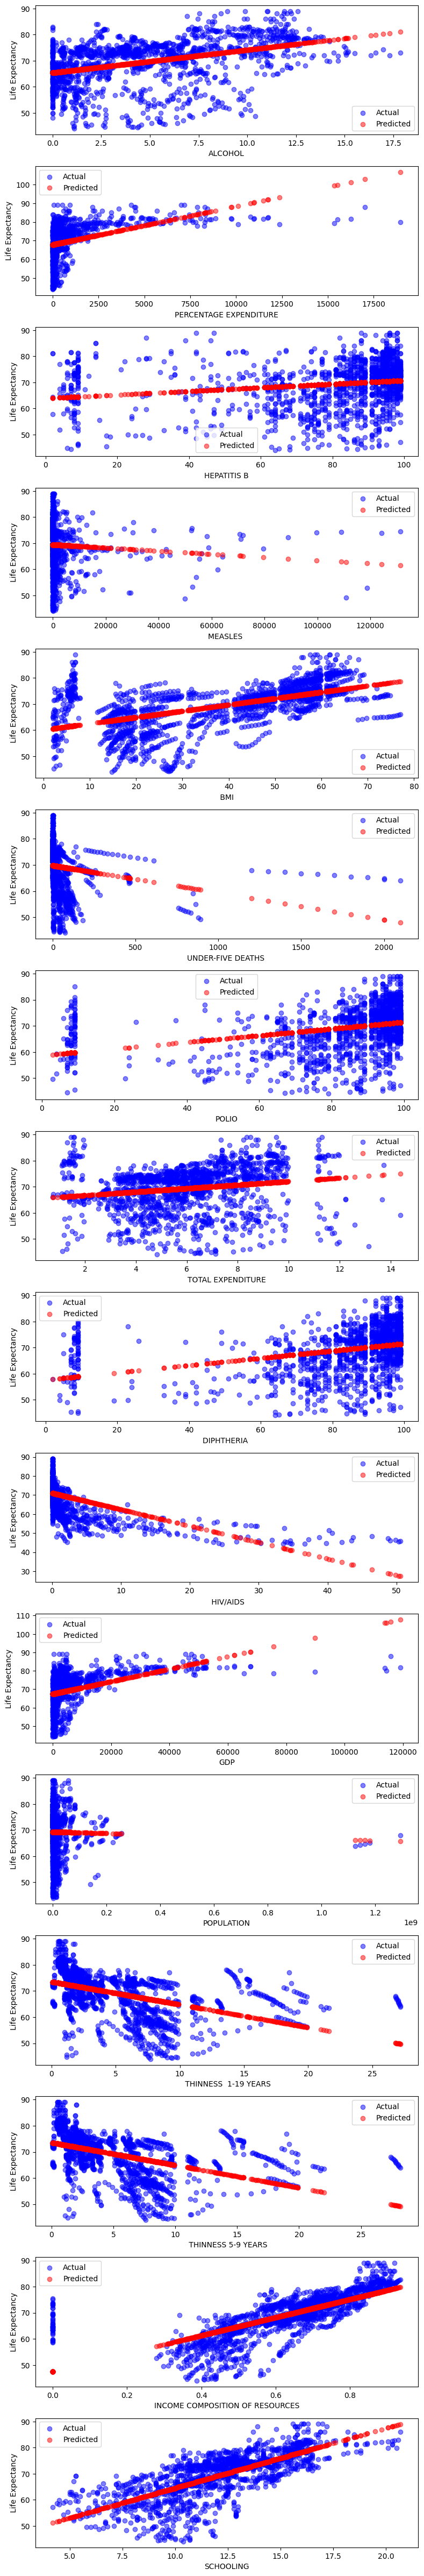

In [106]:
# Create subplots for visualizing each independent variable
fig, axes = plt.subplots(nrows=len(independent_variables), ncols=1, figsize=(8, 3 * len(independent_variables)))

# Fit separate regression models and visualize the results for each independent variable
for i, independent_variable in enumerate(independent_variables):
    # Extract the independent variable and the dependent variable
    X_temp = data[[independent_variable]]
    y_temp = data['LIFE EXPECTANCY ']
    
    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_temp, y_temp)
    
    # Predicted values
    y_pred = model.predict(X_temp)
    
    # Create scatter plot
    ax = axes[i]
    ax.scatter(X_temp, y_temp, label='Actual', color='b', alpha=0.5)
    ax.scatter(X_temp, y_pred, label='Predicted', color='r', alpha=0.5)
    ax.set_xlabel(independent_variable)
    ax.set_ylabel('Life Expectancy')
    ax.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()